In [102]:
import matplotlib.pyplot as plt
import numpy as np

from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor
from src.utils.math_functions import FuncType

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

def fourier2d(img):
    fft = np.fft.fft2(img)
    # долго
    # custom_fft = np.zeros(img.shape, dtype=np.complex_)
    # for u in range(img.shape[0]):
    #     for v in range(img.shape[1]):
    #         val = sum(sum(img[x, y] * np.exp(-1j*2 *np.pi * (u*x / img.shape[0] + v*y / img.shape[1])) for y in range(img.shape[1])) for x in range(img.shape[0]))
    #         custom_fft[u, v] = val
    # 
    # return custom_fft
    return fft

def inv2d(fft):
    invfft = np.fft.ifft2(fft) 
    # custom_fft = np.zeros(fft.shape, dtype=np.complex_)
    # for x in range(fft.shape[0]):
    #     for y in range(fft.shape[1]):
    #         val = sum(sum(fft[u, v] * np.exp(1j*2 *np.pi * (u*x / fft.shape[0] + v*y / fft.shape[1])) for v in range(fft.shape[1])) for u in range(fft.shape[0]))
    #         custom_fft[x, y] = val
    # 
    # return custom_fft / (fft.shape[0] * fft.shape[1])
    return invfft

            

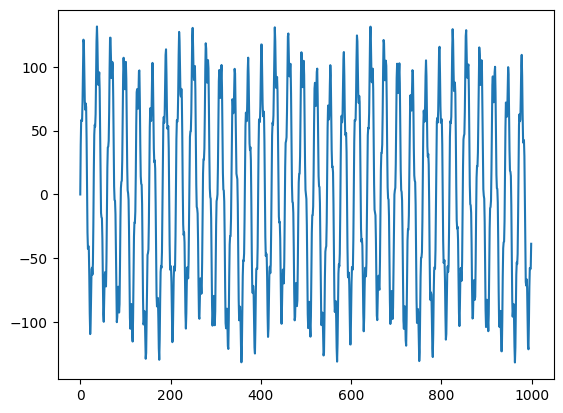

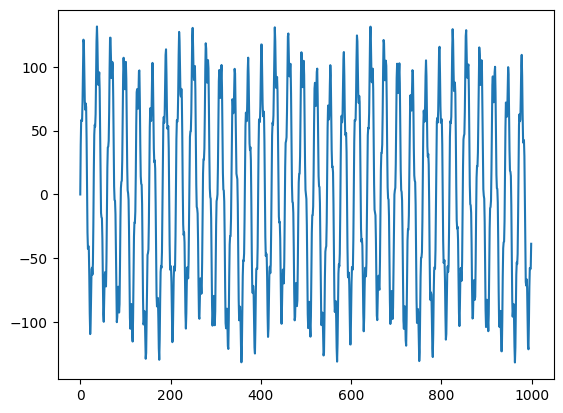

In [103]:
ai = (100, 15, 20)
fi = (33, 5, 170)
poly_harm = model.getFuncData(FuncType.POLY_HARM, ai, fi, dt=0.001)

re, im, _ = analyzer.fourier(poly_harm, len(poly_harm))
poly_harm_inv = analyzer.inverseFourier(re, im, len(poly_harm))
plt.plot(poly_harm)
plt.show()
plt.plot(poly_harm_inv)
plt.show()

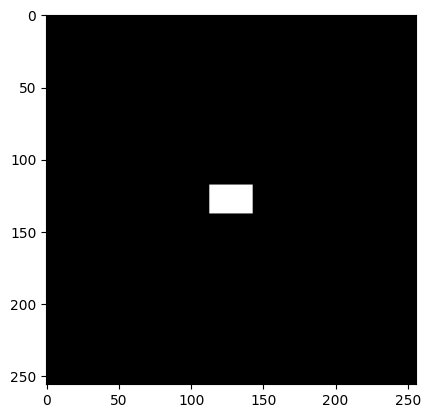

In [104]:
black_on_white = np.zeros((256, 256))
black_on_white[118:138, 113:143] = 255

inout.show_jpg(np.array(black_on_white))

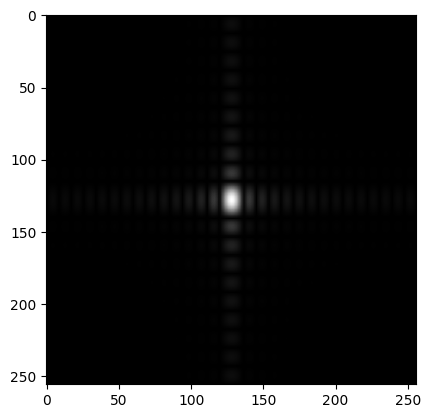

In [105]:
fft = fourier2d(black_on_white)
# inout.show_jpg(np.abs(np.roll(fft, (fft.shape[0] // 2, fft.shape[1] // 2), axis=(1, 0))))
inout.show_jpg(np.abs(np.fft.fftshift(fft)))

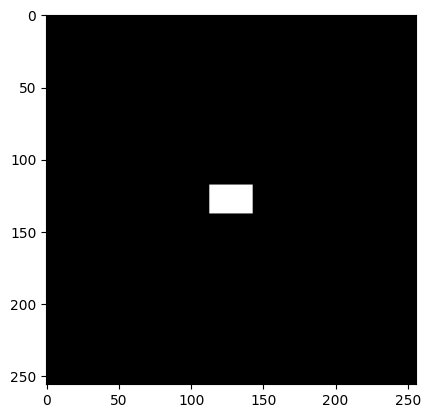

In [106]:
inout.show_jpg(np.abs(inv2d(fft)))

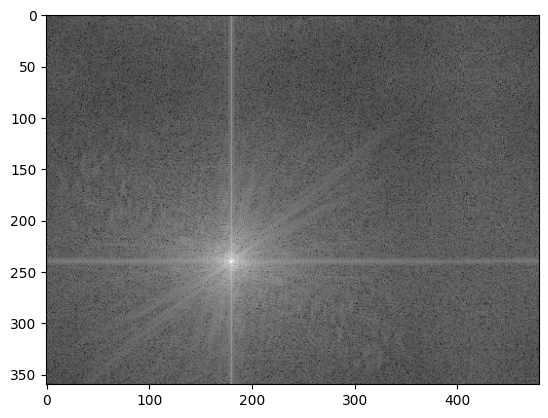

In [107]:
img = inout.read_jpg(img_path + 'grace.jpg')
fft = fourier2d(img)
inout.show_jpg(np.log(1 + np.abs(np.roll(fft, (fft.shape[0] // 2, fft.shape[1] // 2), axis=(1, 0)))))

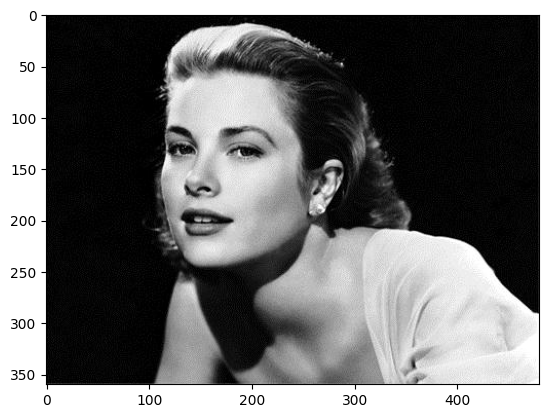

In [108]:
inout.show_jpg(np.abs(inv2d(fft)))